In [1]:
import json 
import torch
import torchvision
from torch import nn
from utils import buit_eval_model, load_json, clear_folder, list_folders, get_class_features, get_experiment_features, integrate
import os
from model import MAE
import numpy as np
from utils_cam import web_cam, node_json, split_json, visualize
from utils import video_clip_procedure, video_clip_stream, video_process_stream
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from utils import cosine_similarity, calculate_cosine_similarity, sort_list
import json
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號



model_folder = r'D:\Project Sekai\MAE Bs PJ\state_dict-75%'
catagory = 'commom_word-75%'
matrix = {}
with open(f'log/{catagory}_indicator.json','w') as f:
    json.dump(matrix,f,ensure_ascii=False)
from tqdm.auto import tqdm

IndentationError: unexpected indent (utils.py, line 592)

In [3]:
model_path_list = [os.path.join(model_folder, name) for name in os.listdir(model_folder)[1:]]
CHECKPOINT_PATH = os.path.join(model_folder, os.listdir(model_folder)[0])

In [4]:
CHECKPOINT_PATH
model_path_list[-1]

'D:\\Project Sekai\\MAE Bs PJ\\state_dict-75%\\epoch 5-3000 weight.pt'

  0%|          | 0/13 [00:00<?, ?it/s]

process:2-100


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:2-1100


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:2-3100


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:2-5100


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:2-6400


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:3-1100


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:3-3100


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:4-100


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:4-2000


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:4-4000


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:4-6400


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:5-1000


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

process:5-3000


  0%|          | 0/211 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

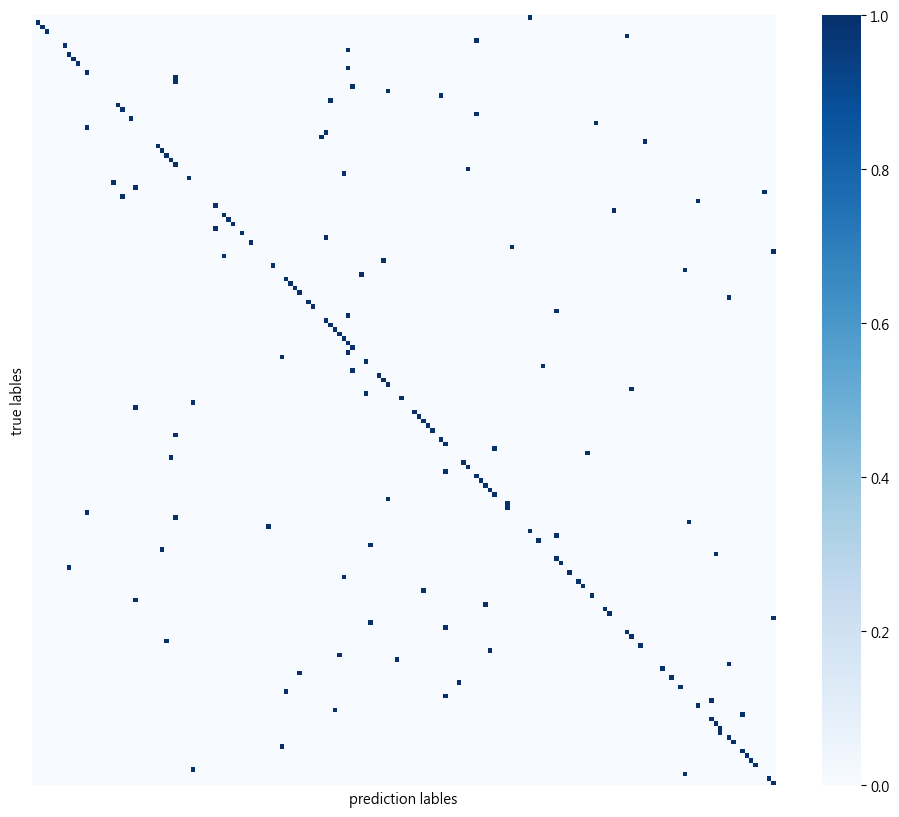

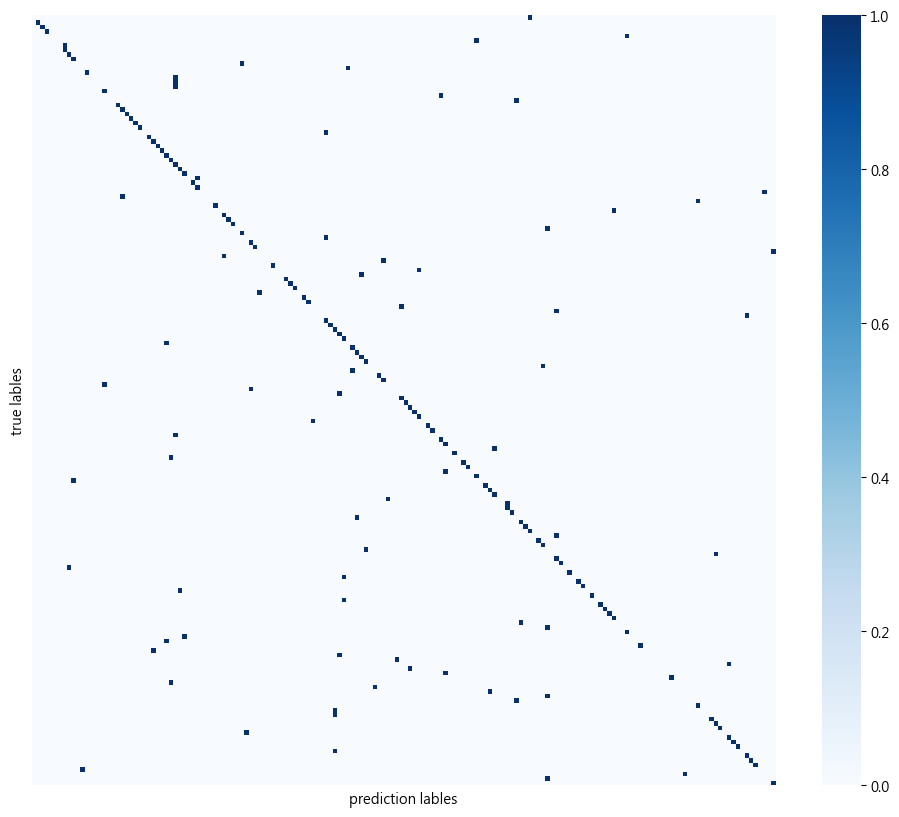

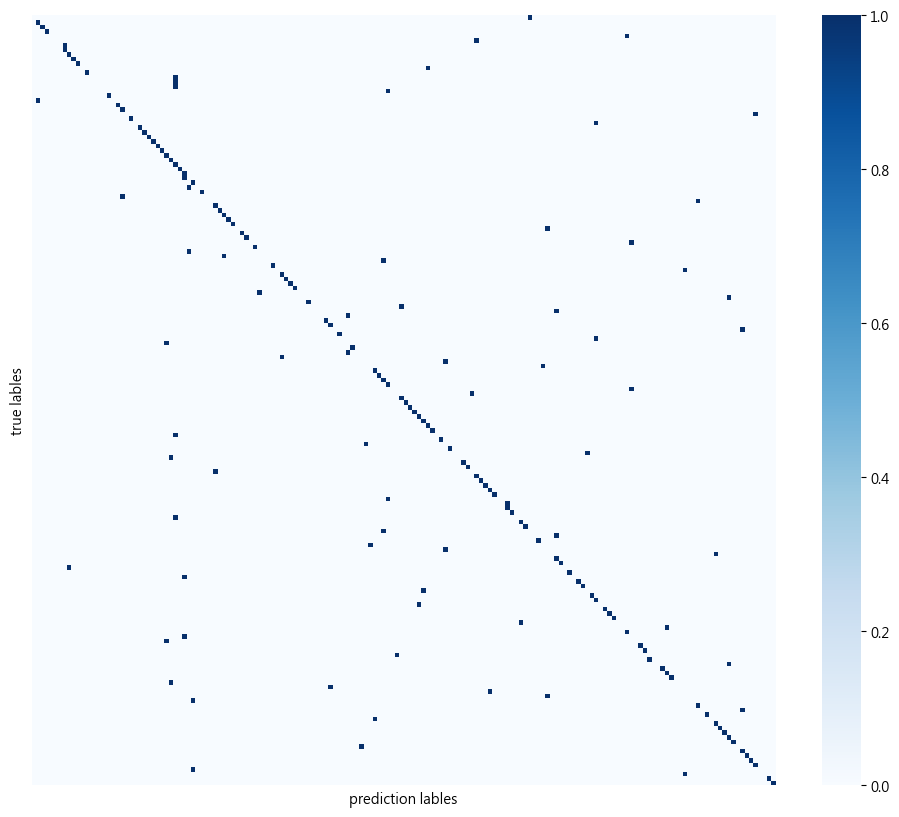

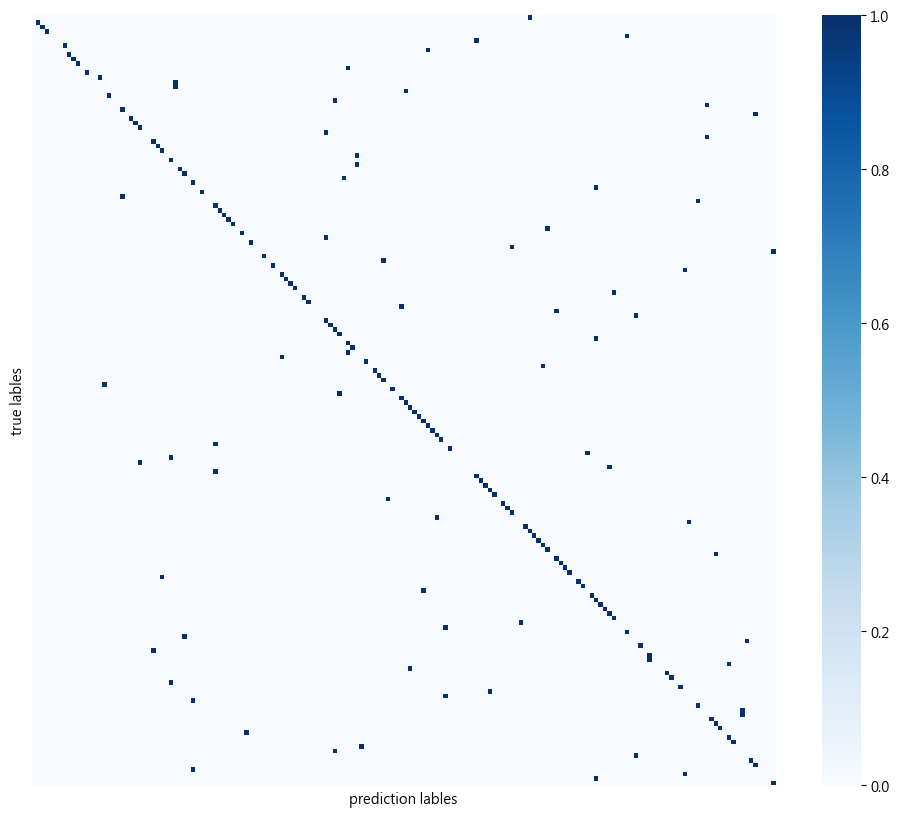

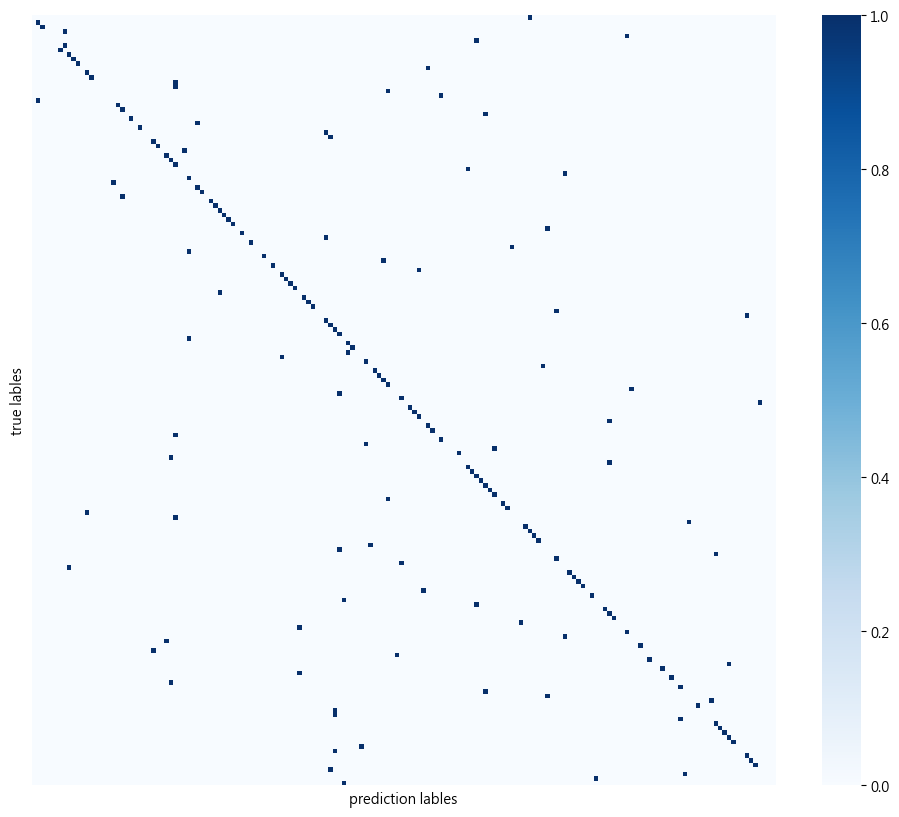

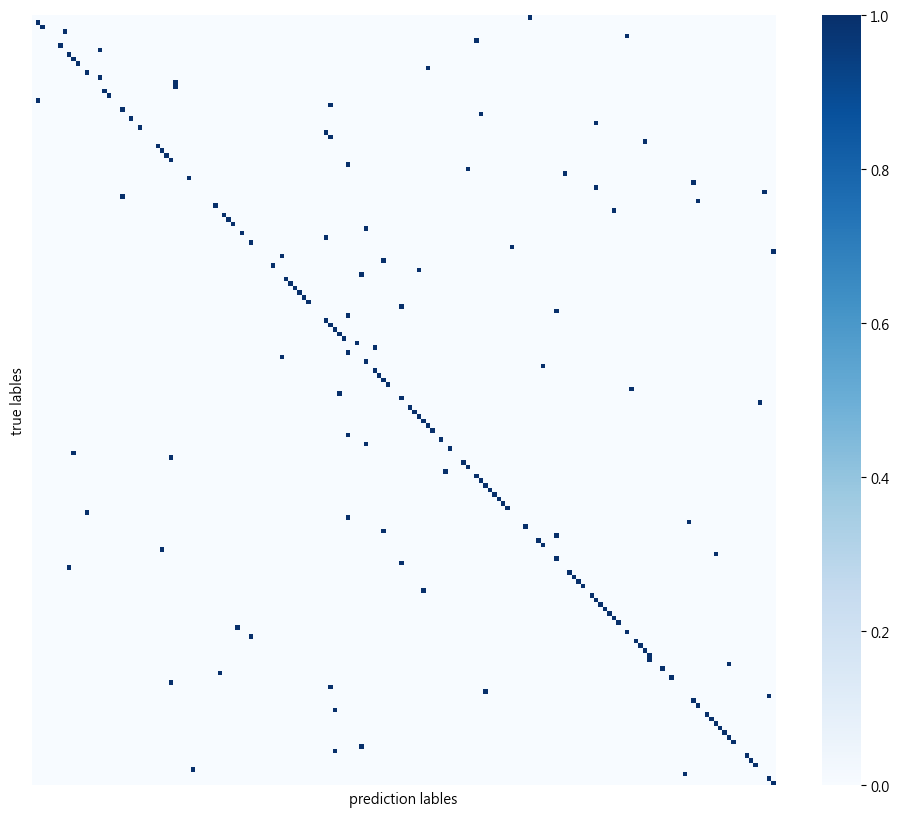

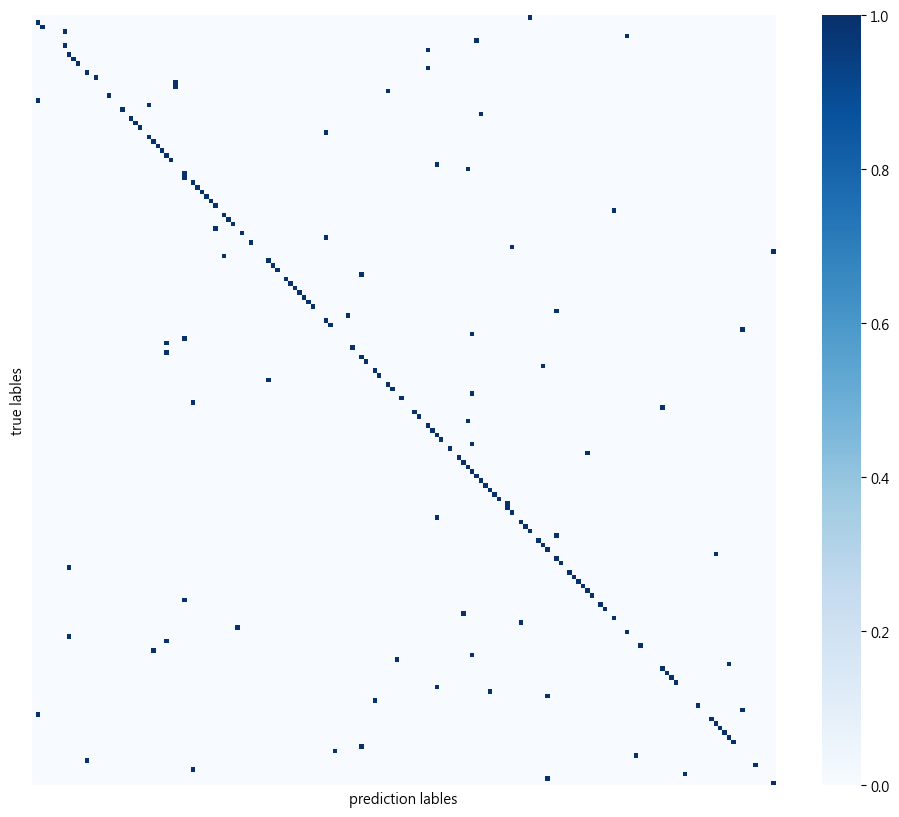

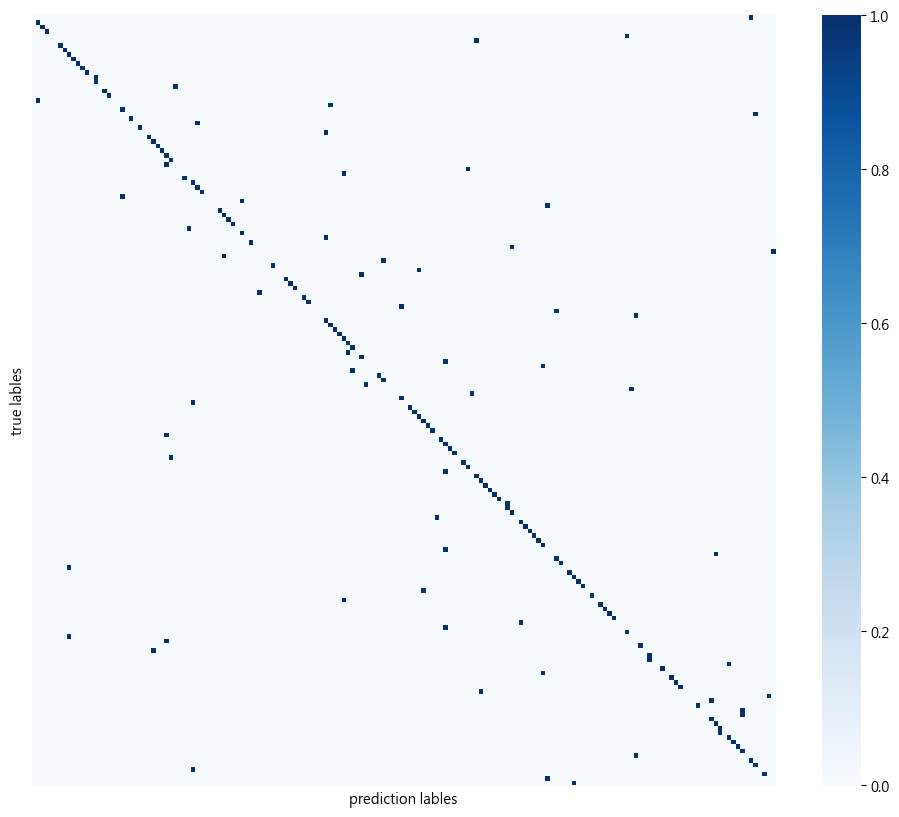

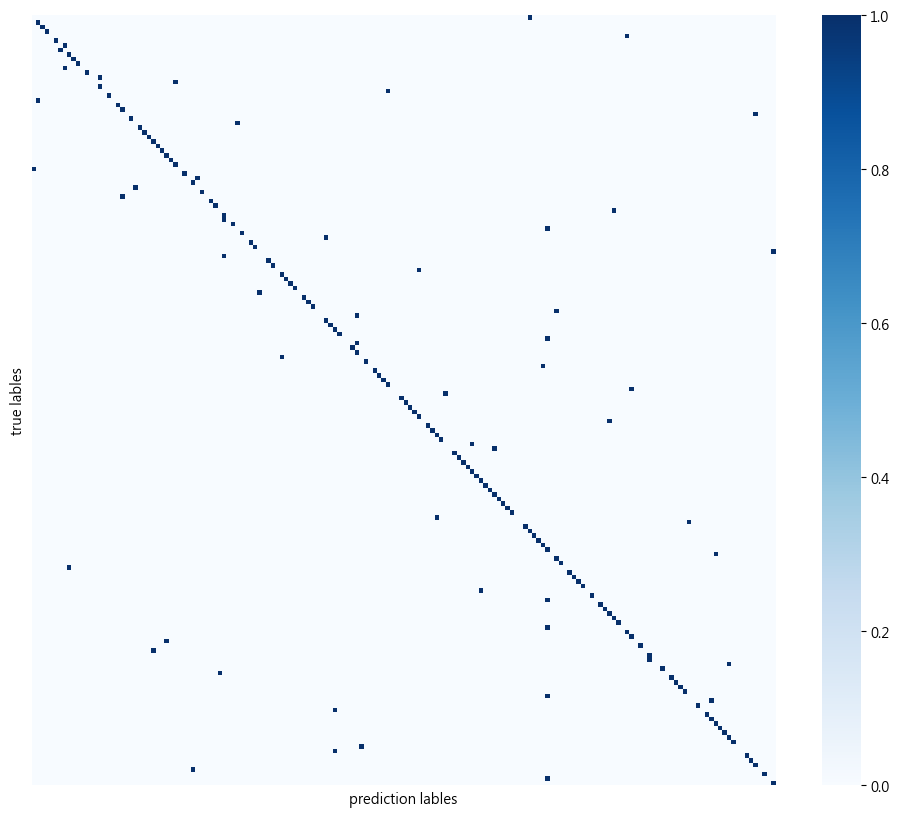

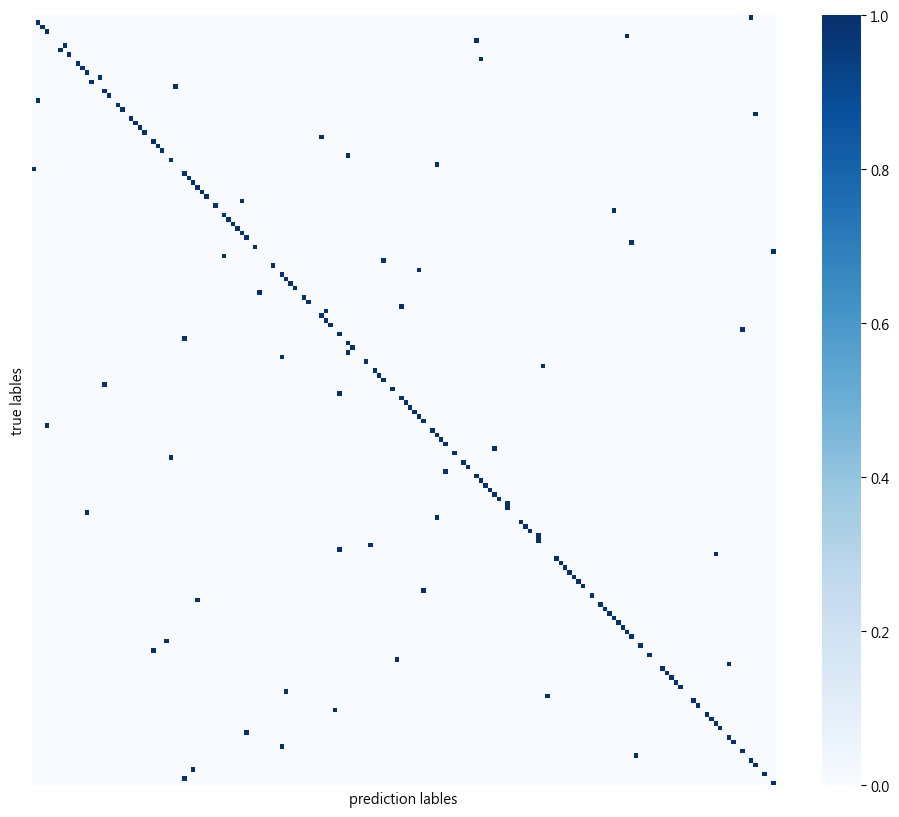

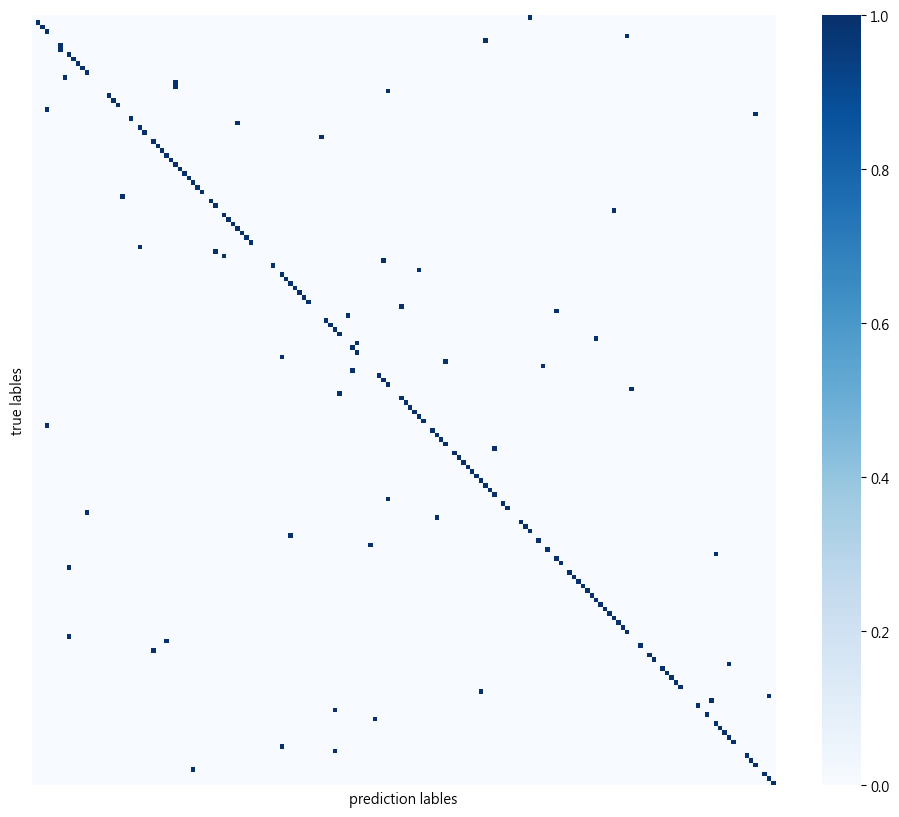

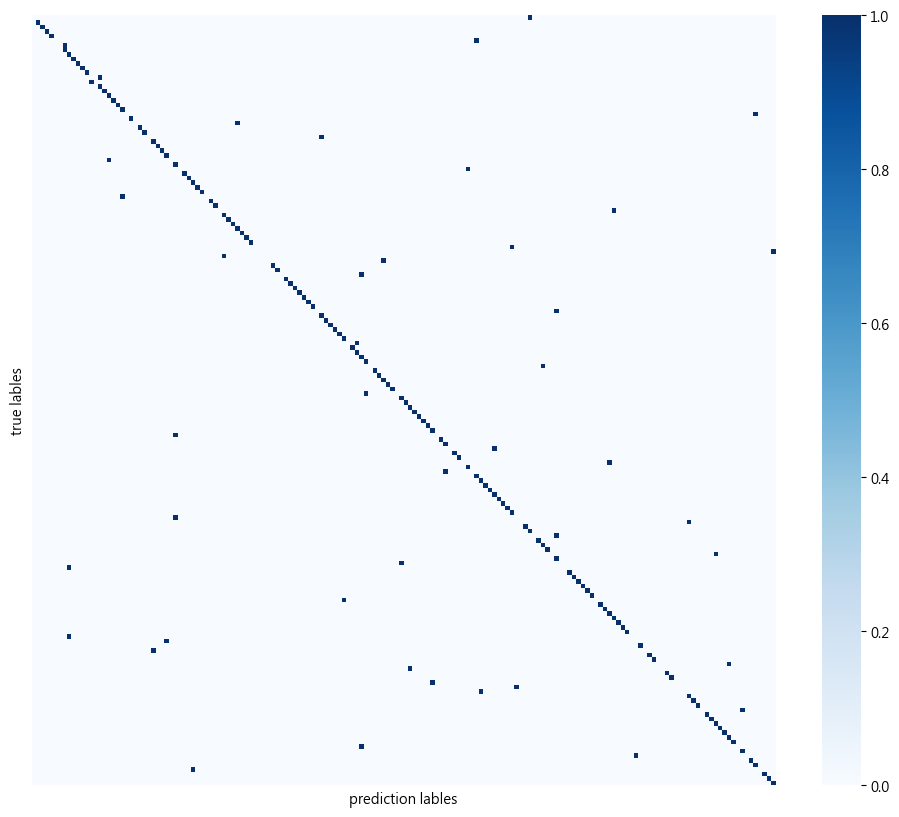

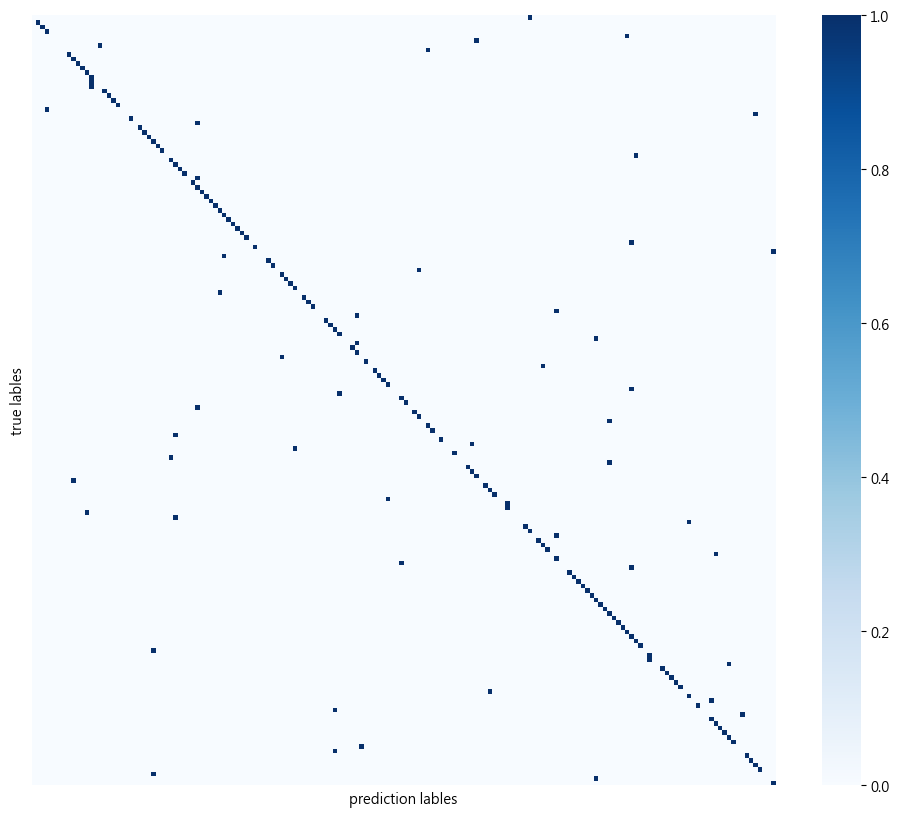

In [4]:
for model_path in tqdm(model_path_list[:]):
    name = os.path.basename(model_path.replace(' ', '').replace('.pt','').replace('epoch','').replace('weight',''))
    print(f'process:{name}')
    checkpoint = torch.load(CHECKPOINT_PATH)
    step = checkpoint['step']
    mean = checkpoint['mean']
    std = checkpoint['std']
    model = buit_eval_model(model_path)
    integrate(mean,
              std,
              model,
              name,
              catagory)

In [6]:
model = buit_eval_model(model_path_list[0])
print(model)

ViT(
  (backbone): MAEBackbone(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): MAEEncoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): LayerNorm((